# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Trends Based on Data

Let's answer the proposed question: "What's the weather like near the equator?"

* Data shows, that as you move farther away (latitude increases) from the equator, temperature falls.
* The scatter plot for latitude vs humidity shows that there is no correlation to describe this relationship.
* No correlation exist between latitude and cloudiness.
* There is no real pattern or relationship that exist between latitude and windspeed.

Northern vs Southern Hemisphere

* In Northern Hemipshere, as latitude increase, temperature decrease. The latter is an inverse relationship.
* In Southern Hemisphere, as latitude  increases or moves toward equator (0 latitude), the temperature increases.
* Humidity, Cloudiness, and Windspeed verush latitude, in Northern and Southern Hemisphere, does not have a correlations to describe their relationships.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

614


In [3]:
print(cities[0])

jamestown


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q={cities[0]}"
response = requests.get(query_url).json()
pprint(response["main"]["humidity"])

64


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [5]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid

url = "https://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="


# Lists for results
lat = []
lng = []
result_cities = []
temperature_F = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

for city in cities:

    try:
        print("Processing Record " + str(city) + ":" )
        #print(query_url + city.replace(" ","+"))
        response = requests.get(query_url + city.replace(" ","+")).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temperature_F.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        result_cities.append(city)
        pprint(f"City processed: {city}")
    except:
        pprint(f"City NOT found: {city}")
        

Processing Record jamestown:
'City processed: jamestown'
Processing Record mataura:
'City processed: mataura'
Processing Record ushuaia:
'City processed: ushuaia'
Processing Record waipawa:
'City processed: waipawa'
Processing Record ucluelet:
'City processed: ucluelet'
Processing Record elizabeth city:
'City processed: elizabeth city'
Processing Record dhidhdhoo:
'City processed: dhidhdhoo'
Processing Record flinders:
'City processed: flinders'
Processing Record busselton:
'City processed: busselton'
Processing Record mecca:
'City processed: mecca'
Processing Record barabai:
'City processed: barabai'
Processing Record talnakh:
'City processed: talnakh'
Processing Record saskylakh:
'City processed: saskylakh'
Processing Record ust-tsilma:
'City processed: ust-tsilma'
Processing Record poco das trincheiras:
'City processed: poco das trincheiras'
Processing Record vaxjo:
'City processed: vaxjo'
Processing Record castro:
'City processed: castro'
Processing Record sterling:
'City processed

'City processed: sao gabriel da cachoeira'
Processing Record jiuquan:
'City processed: jiuquan'
Processing Record alice springs:
'City processed: alice springs'
Processing Record matay:
'City processed: matay'
Processing Record kaitangata:
'City processed: kaitangata'
Processing Record lamar:
'City processed: lamar'
Processing Record rio gallegos:
'City processed: rio gallegos'
Processing Record gurgentepe:
'City processed: gurgentepe'
Processing Record gigmoto:
'City processed: gigmoto'
Processing Record glinishchevo:
'City processed: glinishchevo'
Processing Record semenivka:
'City processed: semenivka'
Processing Record port-cartier:
'City processed: port-cartier'
Processing Record kapit:
'City processed: kapit'
Processing Record kodiak:
'City processed: kodiak'
Processing Record tuktoyaktuk:
'City processed: tuktoyaktuk'
Processing Record misratah:
'City processed: misratah'
Processing Record aksarka:
'City processed: aksarka'
Processing Record guerrero negro:
'City processed: guer

'City processed: thompson'
Processing Record tahe:
'City processed: tahe'
Processing Record natal:
'City processed: natal'
Processing Record te anau:
'City processed: te anau'
Processing Record vila franca do campo:
'City processed: vila franca do campo'
Processing Record sao filipe:
'City processed: sao filipe'
Processing Record launceston:
'City processed: launceston'
Processing Record papillion:
'City processed: papillion'
Processing Record khovu-aksy:
'City processed: khovu-aksy'
Processing Record plovdiv:
'City processed: plovdiv'
Processing Record samusu:
'City NOT found: samusu'
Processing Record kalmunai:
'City processed: kalmunai'
Processing Record matara:
'City processed: matara'
Processing Record vrangel:
'City processed: vrangel'
Processing Record bathsheba:
'City processed: bathsheba'
Processing Record ajdabiya:
'City processed: ajdabiya'
Processing Record codrington:
'City processed: codrington'
Processing Record seddon:
'City processed: seddon'
Processing Record aqtobe:


'City processed: paamiut'
Processing Record marcona:
'City NOT found: marcona'
Processing Record pedro juan caballero:
'City processed: pedro juan caballero'
Processing Record lasa:
'City processed: lasa'
Processing Record liverpool:
'City processed: liverpool'
Processing Record shakiso:
'City processed: shakiso'
Processing Record luzhou:
'City processed: luzhou'
Processing Record santa rosa:
'City processed: santa rosa'
Processing Record peniche:
'City processed: peniche'
Processing Record gurupi:
'City processed: gurupi'
Processing Record petropavlovsk-kamchatskiy:
'City processed: petropavlovsk-kamchatskiy'
Processing Record praxedis guerrero:
'City processed: praxedis guerrero'
Processing Record emba:
'City processed: emba'
Processing Record nizhneyansk:
'City NOT found: nizhneyansk'
Processing Record torbay:
'City processed: torbay'
Processing Record marathon:
'City processed: marathon'
Processing Record blackwater:
'City processed: blackwater'
Processing Record pinheiro machado:


'City processed: cuamba'
Processing Record harlingen:
'City processed: harlingen'
Processing Record baoqing:
'City processed: baoqing'
Processing Record touros:
'City processed: touros'
Processing Record cassilandia:
'City processed: cassilandia'
Processing Record jati:
'City processed: jati'
Processing Record bemidji:
'City processed: bemidji'
Processing Record sorvag:
'City NOT found: sorvag'
Processing Record buckeye:
'City processed: buckeye'
Processing Record hearst:
'City processed: hearst'
Processing Record aneho:
'City processed: aneho'
Processing Record brawley:
'City processed: brawley'
Processing Record kibala:
'City processed: kibala'
Processing Record roebourne:
'City processed: roebourne'
Processing Record kloulklubed:
'City processed: kloulklubed'
Processing Record dogondoutchi:
'City processed: dogondoutchi'
Processing Record bonanza:
'City processed: bonanza'
Processing Record urusha:
'City processed: urusha'
Processing Record ostrovnoy:
'City processed: ostrovnoy'
Pro

In [6]:
#pprint(humidity)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create DataFrame
weather_df = pd.DataFrame({"City": result_cities,
                           "Country": country,
                           "Temperature": temperature_F,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":wind_speed,
                           "Latitude": lat,
                           "Longitude": lng, 
                          "Date": date})

weather_df.head()
# Export DataFrame to a csv file
weather_df.to_csv("/Users/tanishacooper/code/python-api-challenge/WeatherPy/output_files/output_data_file", index_label="City_ID")
weather_df



,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,jamestown,US,48.02,64,100,4.61,42.0970,-79.2353,1650683823
1,mataura,NZ,58.48,61,61,8.63,-46.1927,168.8643,1650684054
2,ushuaia,AR,42.46,75,100,1.14,-54.8000,-68.3000,1650684055
3,waipawa,NZ,57.36,48,52,5.91,-41.4122,175.5153,1650684055
4,ucluelet,CA,50.09,84,97,5.95,48.9329,-125.5528,1650684056
...,...,...,...,...,...,...,...,...,...
553,visby,SE,37.81,93,40,5.75,57.6409,18.2960,1650684263
554,pangody,RU,4.39,94,86,10.11,65.8500,74.4859,1650684263
555,galveston,US,73.99,85,0,3.00,29.3669,-94.9669,1650684146
556,dawei,MM,90.30,55,8,4.34,14.0833,98.2000,1650684264


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Create variable for humidity > 100%
high_humidity = weather_df[(weather_df["Humidity"] > 100)]
high_humidity

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [9]:
# Create a new df with humidity cities removed.
weather_df2 = weather_df.join(high_humidity, how="left", rsuffix= "_x")
weather_df2.merge(high_humidity, how="left")

# Create varaiable to map out the columns you want to keep.
clean_city_data = weather_df2[["City", "Country", "Temperature", "Humidity", "Cloudiness",
                                "Windspeed", "Latitude", "Longitude", "Date"]]
clean_city_data.to_csv("/Users/tanishacooper/code/python-api-challenge/WeatherPy/output_files/Clean_City_Weather_Data.csv", index= False)
clean_city_data.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,jamestown,US,48.02,64,100,4.61,42.0970,-79.2353,1650683823
1,mataura,NZ,58.48,61,61,8.63,-46.1927,168.8643,1650684054
2,ushuaia,AR,42.46,75,100,1.14,-54.8000,-68.3000,1650684055
3,waipawa,NZ,57.36,48,52,5.91,-41.4122,175.5153,1650684055
4,ucluelet,CA,50.09,84,97,5.95,48.9329,-125.5528,1650684056


In [10]:
# Validated that humidity > 100 was removed
#pprint(humidity)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

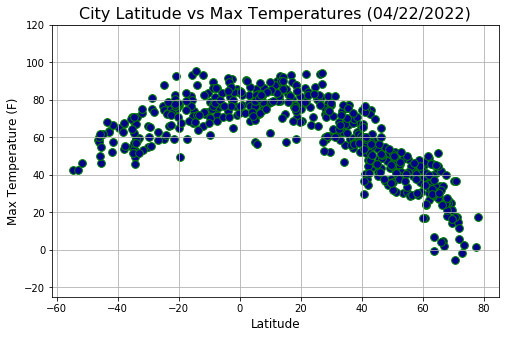

In [11]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Temperature"], 
            s=60, c="darkblue", edgecolors= "green")
plt.title("City Latitude vs Max Temperatures (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Max Temperature (F)", fontsize= 12)
plt.ylim(-25, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/Scatter_Lat_Temp.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Humidity Plot

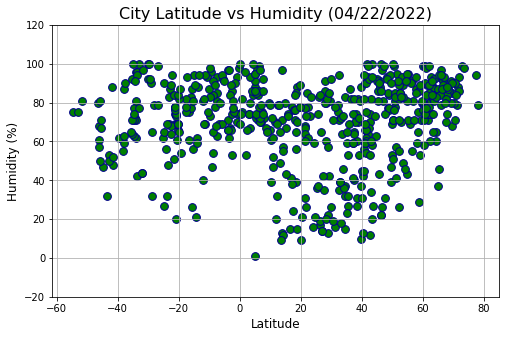

In [13]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Humidity"], 
            s=60, c="green", edgecolors= "darkblue")
plt.title("City Latitude vs Humidity (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Humidity (%)", fontsize= 12)
plt.ylim(-20, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/Scatter_Lat_Humidity.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Cloudiness Plot

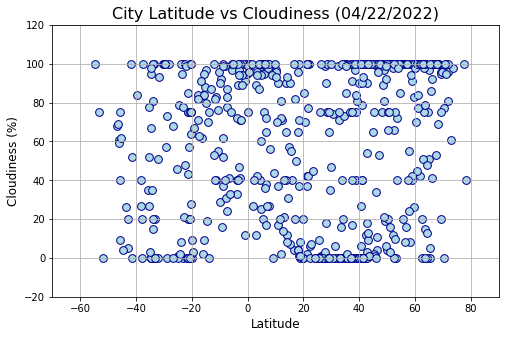

In [14]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Cloudiness"], 
            s=60, c="lightblue", edgecolors= "darkblue")
plt.title("City Latitude vs Cloudiness (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Cloudiness (%)", fontsize= 12)
plt.xlim(-70,90)
plt.ylim(-20, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/Scatter_Lat_Cloudiness.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Wind Speed Plot

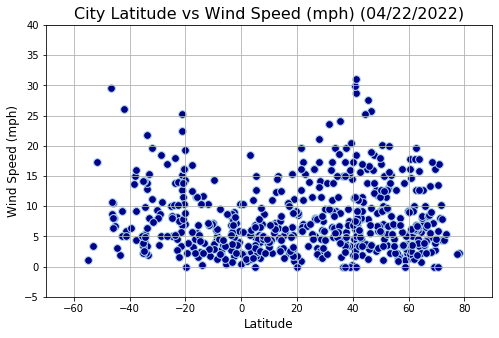

In [15]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Windspeed"], 
            s=60, c="darkblue", edgecolors= "lightblue")
plt.title("City Latitude vs Wind Speed (mph) (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Wind Speed (mph)", fontsize= 12)
plt.xlim(-70,90)
plt.ylim(-5, 40)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/Scatter_Lat_Windspeed.png", 
            index= False)

# Show scatter plot
plt.show()

## Linear Regression

In [16]:
# Create variables for the Northern and Southern Hemispheres
north_hemisphere_df = clean_city_data.loc[pd.to_numeric(clean_city_data
                                                        ["Latitude"]).astype(float) >= 0, :]

#north_hemisphere_df

south_hemisphere_df = clean_city_data.loc[pd.to_numeric(clean_city_data
                                                        ["Latitude"]).astype(float) < 0, :]
#south_hemisphere_df 

In [17]:
# Create x and y values from the northern hemisphere DataFrame and turned it into a float
x = pd.to_numeric(north_hemisphere_df["Latitude"]).astype(float)
y = pd.to_numeric(north_hemisphere_df["Temperature"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

# Create line regression values
line_regress_value = x * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: 0.18532593504132905
y = -0.95x + 93.34


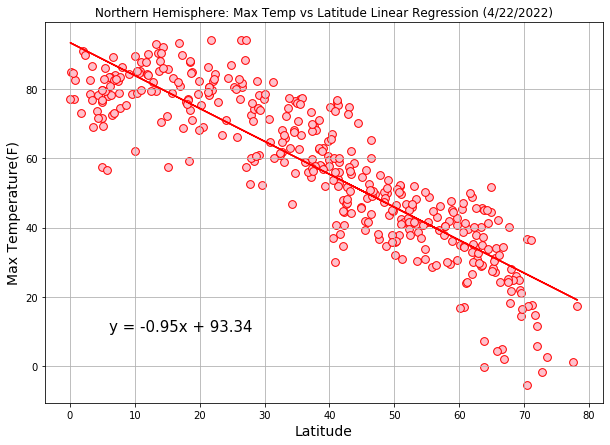

In [39]:
# Plot scatter plot, line regression, and line equation for Northern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x,y, s=60, c= "pink", edgecolors= "red")

plt.plot(x,line_regress_value,"r-")
plt.annotate(line_eq,(6,10), fontsize= 15, color="black")
plt.title("Northern Hemisphere: Max Temp vs Latitude Linear Regression (4/22/2022)", fontsize= 12)
plt.ylabel("Max Temperature(F)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/North_Temp_Lat_linreg.png", 
            index= False)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
# Create x and y values from the southern hemisphere DataFrame and turned it into a float
x_south = pd.to_numeric(south_hemisphere_df["Latitude"]).astype(float)
y_south = pd.to_numeric(south_hemisphere_df["Temperature"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south)

# Create line regression values
line_regress_value_south = x_south * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: 0.18532593504132905
y = 0.6x + 83.92


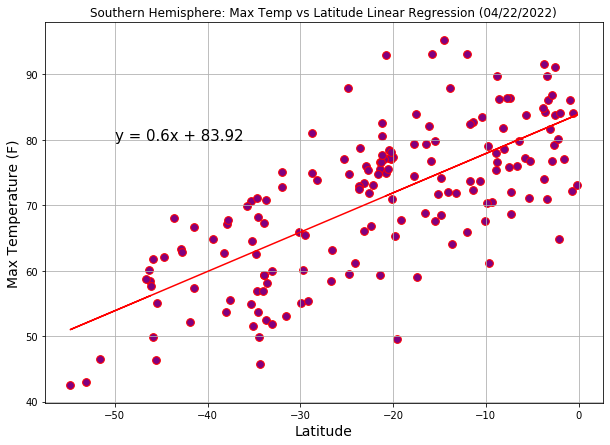

In [38]:
# Plot scatter plot, line regression, and line equation for Southern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x_south,y_south, s=60, c= "purple", edgecolors= "red")

plt.plot(x_south,line_regress_value_south,"r-")
plt.annotate(line_eq_south,(-50,80), fontsize= 15, color="black")
plt.title("Southern Hemisphere: Max Temp vs Latitude Linear Regression (04/22/2022)", fontsize= 12)
plt.ylabel("Max Temperature (F)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq_south)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/South_Temp_Lat_linreg.png", 
            index= False)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
# Create x and y values from the northern hemisphere DataFrame and turned it into a float
x_humidity_N = pd.to_numeric(north_hemisphere_df["Latitude"]).astype(float)
y_humidity_N = pd.to_numeric(north_hemisphere_df["Humidity"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_humidity_N,y_humidity_N)

# Create line regression values
line_regress_value_humid_N = x_humidity_N * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq_humid_N = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: 0.18532593504132905
y = 0.26x + 58.66


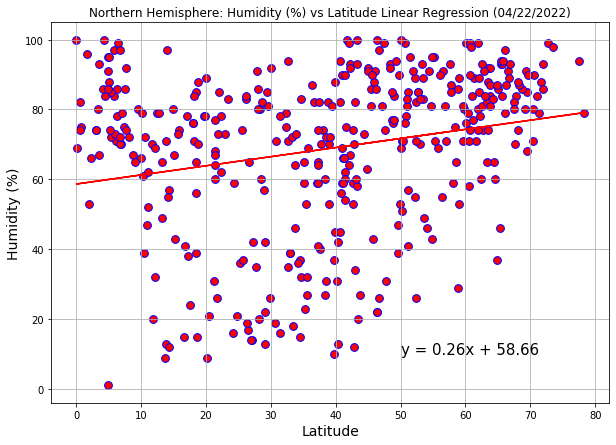

In [37]:
# Plot scatter plot, line regression, and line equation for Northern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x_humidity_N,y_humidity_N, s=60, c= "red", edgecolors= "blue")

plt.plot(x_humidity_N,line_regress_value_humid_N,"r-")
plt.annotate(line_eq_humid_N,(50,10), fontsize= 15, color="black")
plt.title("Northern Hemisphere: Humidity (%) vs Latitude Linear Regression (04/22/2022)", fontsize= 12)
plt.ylabel("Humidity (%)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq_humid_N)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/North_Humidity_Lat_linreg.png", 
            index= False)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [33]:
# Create x and y values 
x_humidity_S = pd.to_numeric(south_hemisphere_df["Latitude"]).astype(float)
y_humidity_S = pd.to_numeric(south_hemisphere_df["Humidity"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_humidity_S,y_humidity_S)

# Create line regression values
line_regress_value_humid_S = x_humidity_S * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq_humid_S = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: 0.1657962548130388
y = 0.24x + 78.45


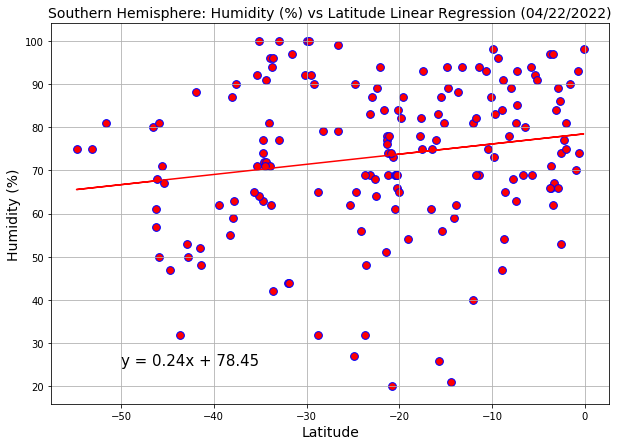

In [44]:
# Plot scatter plot, line regression, and line equation for Southern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x_humidity_S,y_humidity_S, s=60, c= "red", edgecolors= "blue")

plt.plot(x_humidity_S,line_regress_value_humid_S,"r-")
plt.annotate(line_eq_humid_S,(-50,25), fontsize= 15, color="black")
plt.title("Southern Hemisphere: Humidity (%) vs Latitude Linear Regression (04/22/2022)", fontsize= 14)
plt.ylabel("Humidity (%)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq_humid_S)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/South_Humidity_Lat_linreg.png", 
            index= False)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [40]:
# Create x and y values 
x_cloudiness_N = pd.to_numeric(north_hemisphere_df["Latitude"]).astype(float)
y_cloudiness_N = pd.to_numeric(north_hemisphere_df["Cloudiness"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_cloudiness_N,y_cloudiness_N)

# Create line regression values
line_regress_value_cloud_N = x_cloudiness_N * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq_cloud_N = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: 0.25373188599764823
y = 0.33x + 46.73


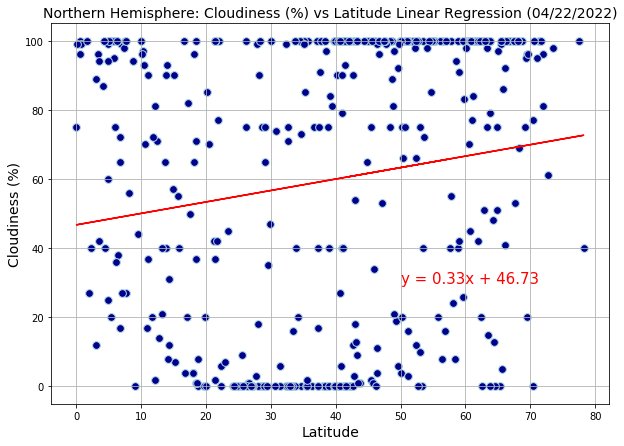

In [49]:
# Plot scatter plot, line regression, and line equation for Northern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x_cloudiness_N,y_cloudiness_N, s=60, c= "darkblue", edgecolors= "lightblue")

plt.plot(x_cloudiness_N,line_regress_value_cloud_N,"r-")
plt.annotate(line_eq_cloud_N,(50,30), fontsize= 15, color="red")
plt.title("Northern Hemisphere: Cloudiness (%) vs Latitude Linear Regression (04/22/2022)", fontsize= 14)
plt.ylabel("Cloudiness (%)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq_cloud_N)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/North_Cloud_Lat_linreg.png", 
            index= False)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [50]:
# Create x and y values 
x_cloudiness_S = pd.to_numeric(south_hemisphere_df["Latitude"]).astype(float)
y_cloudiness_S = pd.to_numeric(south_hemisphere_df["Cloudiness"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_cloudiness_S,y_cloudiness_S)

# Create line regression values
line_regress_value_cloud_S = x_cloudiness_S * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq_cloud_S = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: 0.25373188599764823
y = 0.67x + 71.84


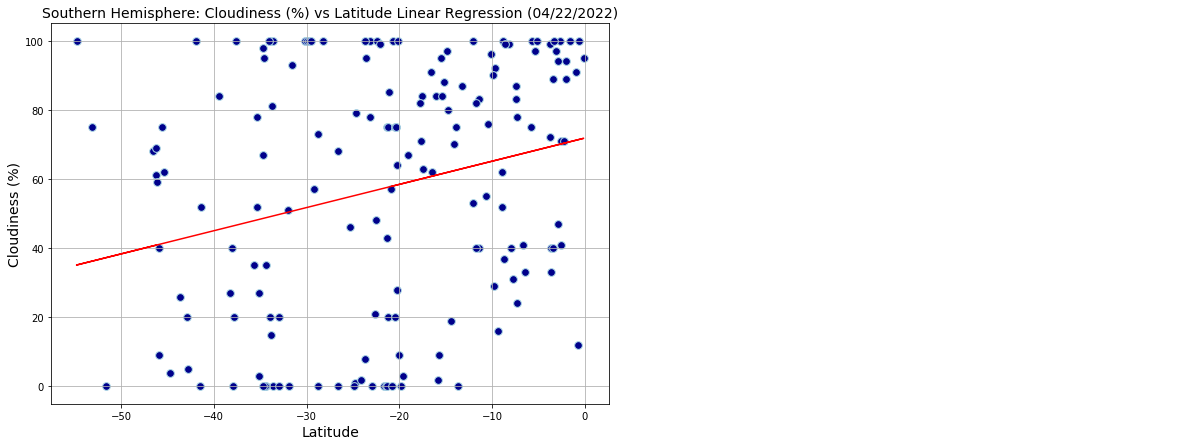

In [51]:
# Plot scatter plot, line regression, and line equation for Southern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x_cloudiness_S,y_cloudiness_S, s=60, c= "darkblue", edgecolors= "lightblue")

plt.plot(x_cloudiness_S,line_regress_value_cloud_S,"r-")
plt.annotate(line_eq_cloud_S,(50,30), fontsize= 15, color="red")
plt.title("Southern Hemisphere: Cloudiness (%) vs Latitude Linear Regression (04/22/2022)", fontsize= 14)
plt.ylabel("Cloudiness (%)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq_cloud_S)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/South_Cloud_Lat_linreg.png", 
            index= False)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [54]:
# Create x and y values 
x_windspeed_N = pd.to_numeric(north_hemisphere_df["Latitude"]).astype(float)
y_windspeed_N = pd.to_numeric(north_hemisphere_df["Windspeed"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_windspeed_N,y_windspeed_N)

# Create line regression values
line_regress_value_windspeed_N = x_windspeed_N * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq_windspeed_N = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: 0.0756245576994384
y = 0.02x + 7.14


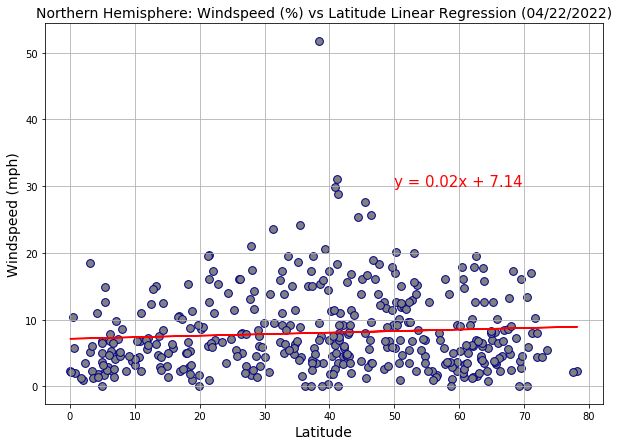

In [55]:
# Plot scatter plot, line regression, and line equation for Northern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x_windspeed_N,y_windspeed_N, s=60, c= "grey", edgecolors= "darkblue")

plt.plot(x_windspeed_N,line_regress_value_windspeed_N,"r-")
plt.annotate(line_eq_windspeed_N,(50,30), fontsize= 15, color="red")
plt.title("Northern Hemisphere: Windspeed (%) vs Latitude Linear Regression (04/22/2022)", fontsize= 14)
plt.ylabel("Windspeed (mph)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq_windspeed_N)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/North_Windspeed_Lat_linreg.png", 
            index= False)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [56]:
# Create x and y values
x_windspeed_S = pd.to_numeric(south_hemisphere_df["Latitude"]).astype(float)
y_windspeed_S = pd.to_numeric(south_hemisphere_df["Windspeed"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_windspeed_S,y_windspeed_S)

# Create line regression values
line_regress_value_windspeed_S = x_windspeed_S * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq_windspeed_S = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: -0.2767285824005119
y = -0.11x + 5.38


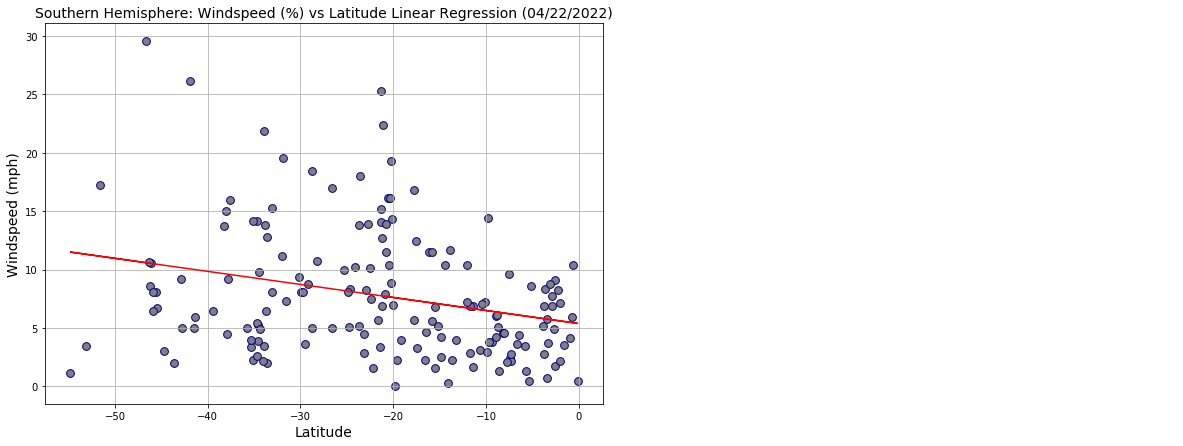

In [57]:
# Plot scatter plot, line regression, and line equation for Southern Hemisphere

plt.rcParams["figure.figsize"] = (10,7)
plt.scatter(x_windspeed_S,y_windspeed_S, s=60, c= "grey", edgecolors= "darkblue")

plt.plot(x_windspeed_S,line_regress_value_windspeed_S,"r-")
plt.annotate(line_eq_windspeed_S,(50,30), fontsize= 15, color="red")
plt.title("Southern Hemisphere: Windspeed (%) vs Latitude Linear Regression (04/22/2022)", fontsize= 14)
plt.ylabel("Windspeed (mph)", fontsize= 14)
plt.xlabel("Latitude", fontsize= 14)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq_windspeed_S)

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/South_Windspeed_Lat_linreg.png", 
            index= False)
plt.show()